In [25]:
import sys
sys.path.insert(0,'/home/jhon/Imagens/patankar-euler')

from numerical_calculations import *

import numpy as np
import matplotlib.pyplot as plt

In [26]:
def lotka_volterra(z, a1, b1, a2, b2):
    x1, x2 = z
    dx1dt = a1 * x1 - b1 * x1 * x2
    dx2dt = a2 * x2 * b2 - x1 * x2
    return np.array([dxdt, dydt])

In [28]:
a1,a2,b1,b2 = 0.1 , 0.1, 0.1, 0.12
sigma1, sigma2 = 0.2 , 0.2

def f(t, x):
    x = np.array([b1,b2])*x
    return x

def d(t,x):
    x = np.array([a1, a2])*x[::-1]*x
    return x

def g(t,x):
    x = np.array([sigma1, sigma2])*x
    return x

In [31]:
def simulation_cem_fcem(h = 1/(2**4), sigma1 = 0.2, sigma2 = 0.2, initial = 0, end = 100):

    times = np.linspace(initial,end, (end-initial)*(int(1/h)))

    initial_condition = [6 , 6]

    cem = composite_euler_method([f], [d], [g], times, initial_condition)

    fcem = fully_composite_euler_method([f], [d], [g], times, initial_condition)

    return cem , fcem


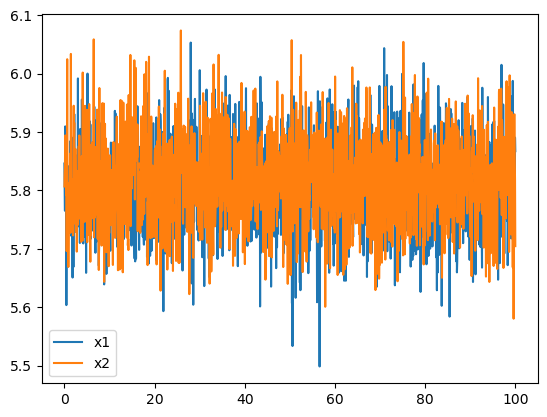

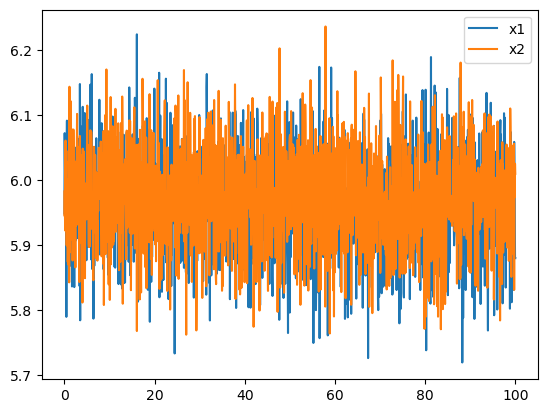

In [32]:
cem, fcem = simulation_cem_fcem(h = 1/(2**4),sigma1= 0.2, sigma2=0.2)
fcem

times = np.linspace(0,100, 100*(2**4))
plt.plot(times, fcem[:, 0], label = 'x1')
plt.plot(times, fcem[:, 1], label = 'x2')
plt.legend()
plt.show()

plt.plot(times, cem[:, 0], label = 'x1')
plt.plot(times, cem[:, 1], label = 'x2')
plt.legend()
plt.show()


In [77]:
counting_simulations = 0
step_value = 0
step_numbers = []


for i in range(1000):
    cem, fcem = simulation_cem_fcem(sigma1 = 0.8 , sigma2 = 0.8)

    for j in range(len(fcem)):
        if np.any(fcem[j] < 0):
            counting_simulations += 1
            step_value += len(fcem[j][fcem[j] < 0])
        step_numbers.append(step_value)

print(counting_simulations)
print(np.mean(step_numbers))


0
0.0


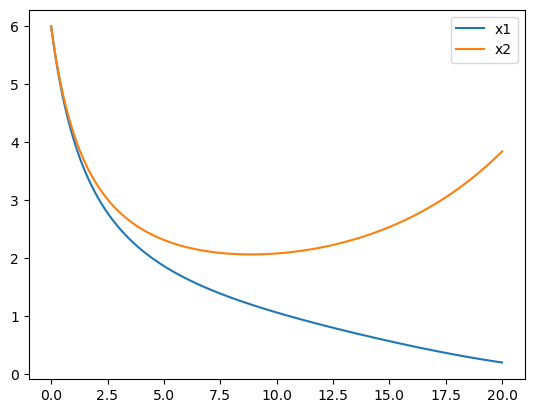

In [122]:
times = np.linspace(0,20, 100*(2**15))

ee = explicit_euler([f], [d], times, [6, 6])

plt.plot(times, ee[0], label = 'x1')
plt.plot(times, ee[1], label = 'x2')
plt.legend()
plt.show()